In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

#import all the Necessary Libraries

In [2]:
df=pd.read_csv('bigmart_data.csv')

df.info()


#Revealing the files info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [3]:
#chcecking the volume of the missing Data

df.isnull().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [4]:
#let Handle them
#first let start with Outlet_Size

df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].median())

In [5]:
#let handle the Missing data Outlet_Size object string 

filling_list=df['Outlet_Size'].dropna().tolist()
df['Outlet_Size']=df['Outlet_Size'].fillna(pd.Series(np.random.choice(filling_list,size=len(df.index))))

In [6]:
#checking if we till have missing data

df[df.isnull().any(axis=1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [7]:
#no Missing Data

#let talk About The Dataset Itself

The Big Mart is Growing Grocery Supermarket store Brand. As we are Appointing our Franchise in all over World. 
Big Mart Brand has started its journey with free home delivery services of food and grocery.

#Let Take A gLance to Look or to Know The Meaning of Each columns in our Dataset

💨Item_Identifier: Item identifiers to uniquely distinguish each item
    
💨Item weight: This is the actual weight of the item
    
💨Item_Fat_Content: The amount of fat contained in something, usually a food product
    
💨Item Visibility: This is the ability for shoppers to discover, identify, and engage with products.
    
💨Item Type: is a classification of the components that make up a workflow process
    
💨Item MRP:is a standard supply planning system to help businesses, primarily product-based manufacturers, 
    understand inventory requirements while balancing supply and demand
    
💨Outlet_Identifier:A unique identifier assigned to each service type outlet
    
💨Outlet_Establishment_Year:A retail outlet or store is a retail sales establishment which has a genuine retail activity and 
    ential the Year of it existence in the sales area
    
💨Outlet_Size: The standard size single switch or outlet 
    
💨Outlet_Location:a large group of shops, usually outside a town or city, that each sell and  
    made by a particular company, for a reduced price

💨OUtlet_type:  is a classification of the stores in the location
    
💨Item_Outlet_Sales:A retail outlet or store is a retail sales establishment which has a genuine retail activity and 
which therefore has a sales area



# EDA

In [8]:
df.sample(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1991,FDS08,5.735,Low Fat,0.056961,Fruits and Vegetables,176.3370,OUT046,1997,Small,Tier 1,Supermarket Type1,1764.3700
1232,FDQ01,19.700,Regular,0.161028,Canned,254.1014,OUT045,2002,Small,Tier 2,Supermarket Type1,4845.0266


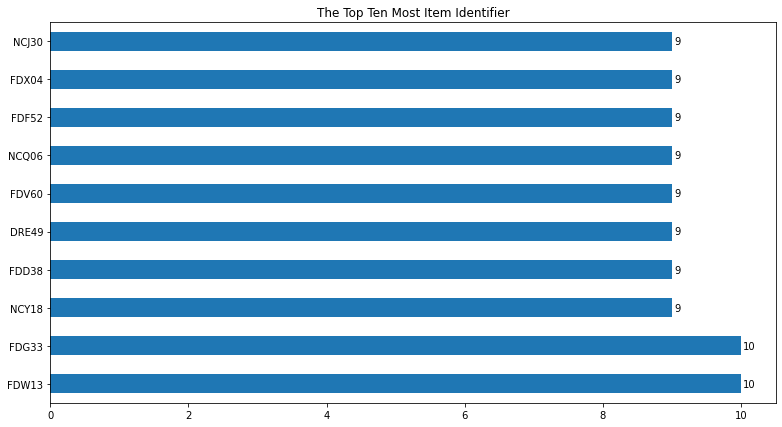

In [9]:
#what are the most Top Ten Most high Item Identifier???

fig=df['Item_Identifier'].value_counts()[:10].plot(kind='barh',figsize=(13,7))
plt.title('The Top Ten Most Item Identifier')
for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=2)

Item FDW13  and FDG33 is the Most has the Most Sales.

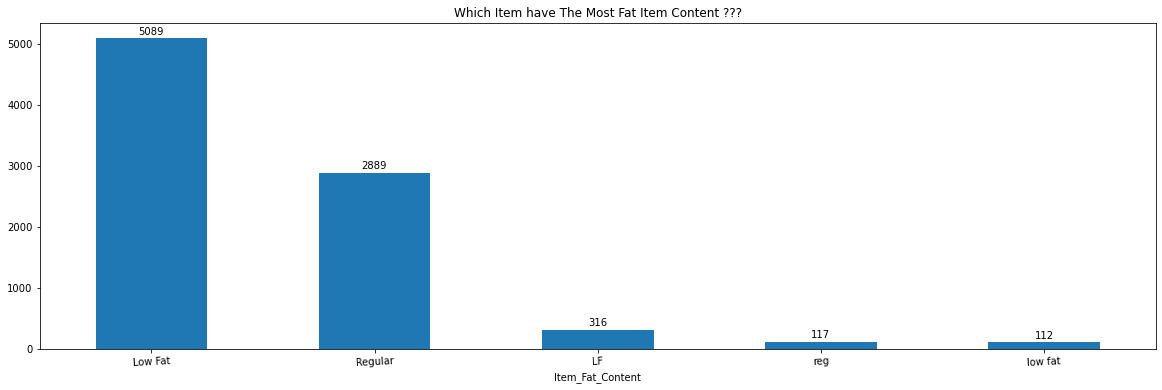

In [10]:
#which item has more Fat_Item?


axes=df.groupby('Item_Fat_Content')['Item_Weight'].count().sort_values(ascending=False).plot(kind='bar',figsize=(20,6))
plt.title('Which Item have The Most Fat Item Content ???')
plt.xticks(rotation=3)
for container in axes.containers:
    axes.bar_label(container,label_type='edge',padding=2)

It should be Know that Low_Fat Item Is the Most Item That Has Fat Content

Text(0.5, 1.0, 'The Visibility of Fat Item in The Store')

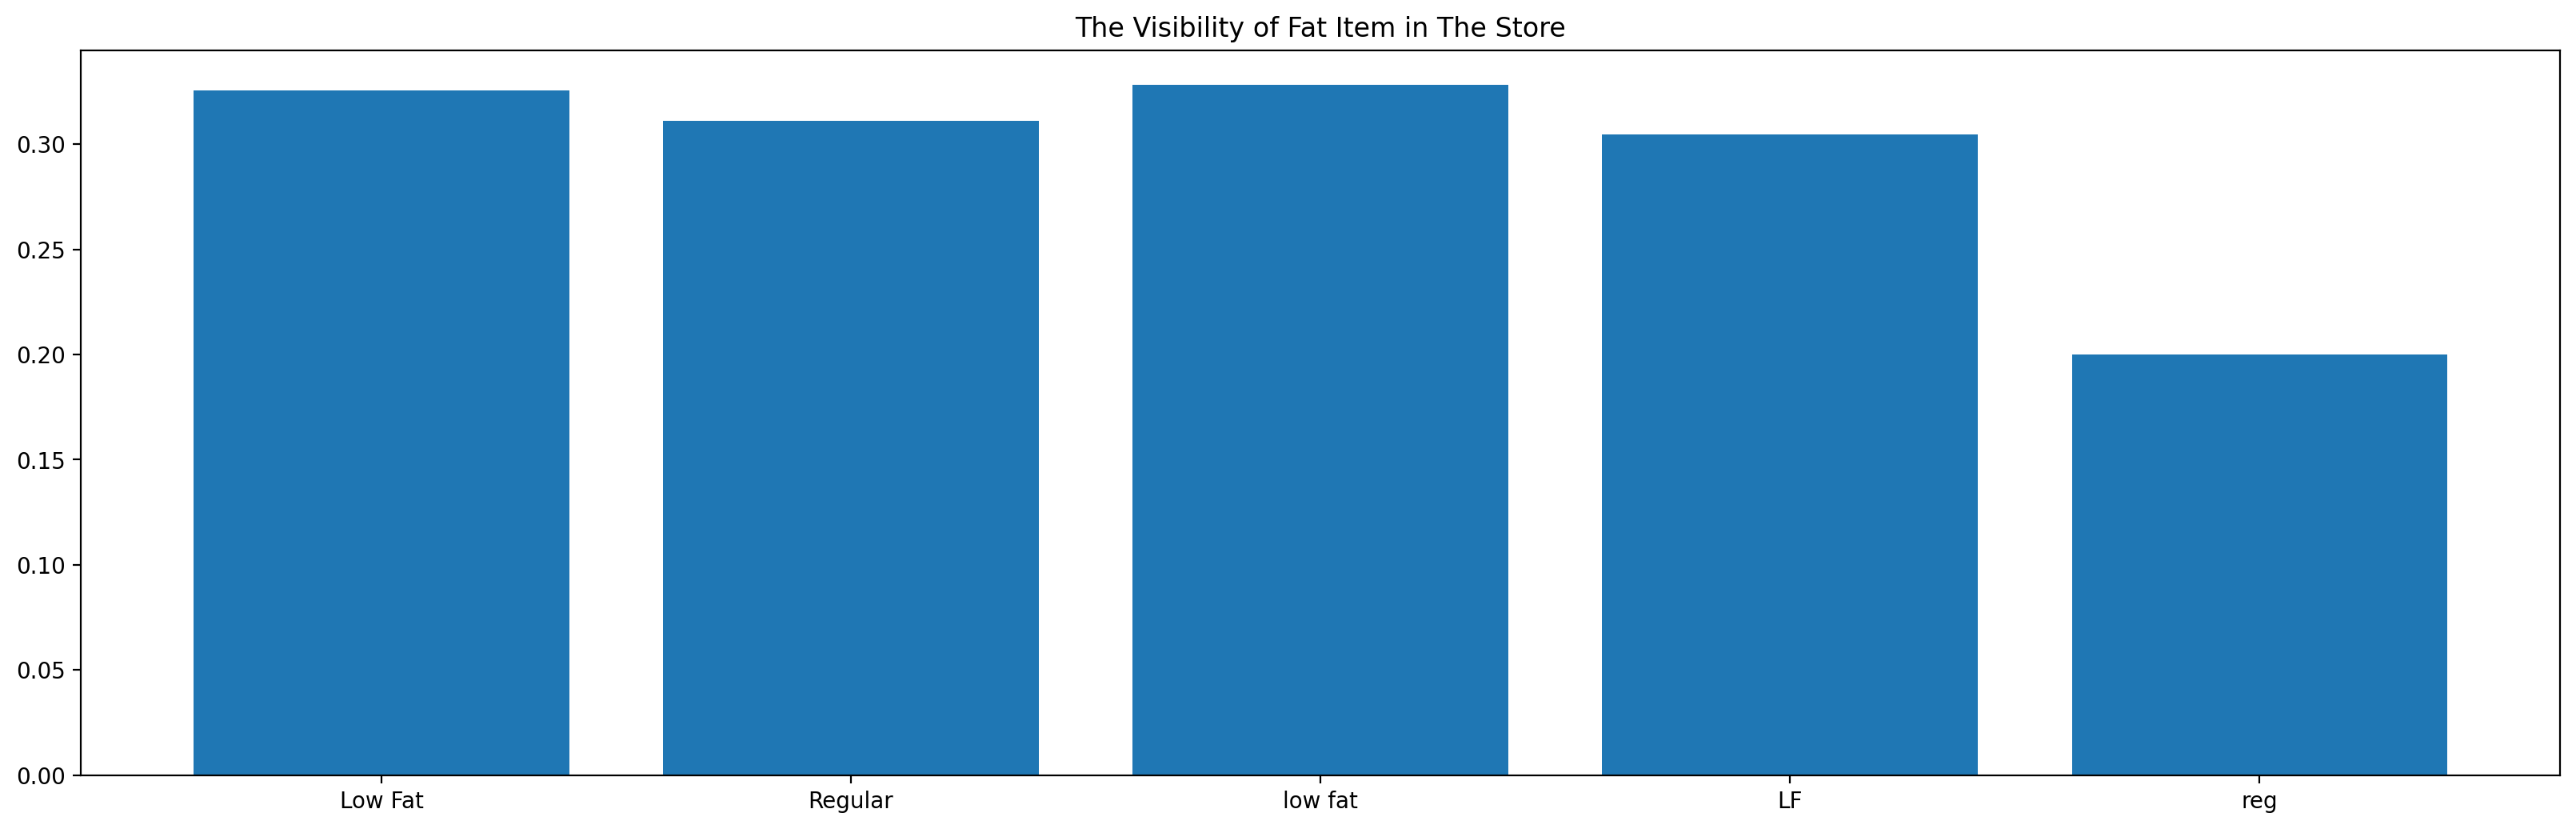

In [11]:
#REVEALING THE viSIBILITY iTEMS

plt.figure(figsize=(20,6),dpi=200)
x=df['Item_Fat_Content']
y=df['Item_Visibility']
plt.bar(x,y)
plt.title('The Visibility of Fat Item in The Store')

Fruit&Vegetable Take The Lead Of the Most item More weight among the category of item in the Store

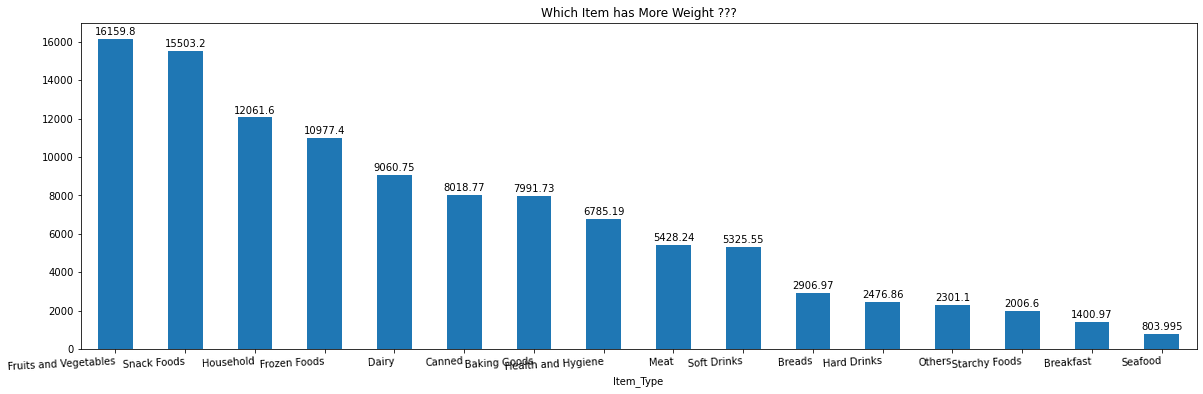

In [12]:
#WHICH iTEM AS MORE WEIGHT?

axes=df.groupby('Item_Type')['Item_Weight'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,6))
plt.title('Which Item has More Weight ???')
plt.xticks(rotation=3,ha='right')
for container in axes.containers:
    axes.bar_label(container,label_type='edge',padding=2)

Fruit&Vegetable Take The Lead Of the Most item More weight among the category of item in the Store

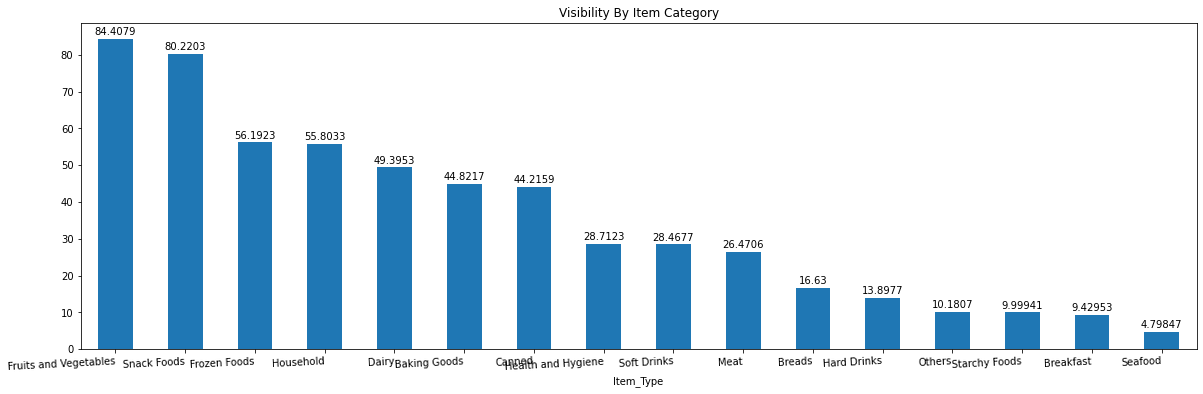

In [13]:
#Which Item category  hhas more viisbility?

axes=df.groupby('Item_Type')['Item_Visibility'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,6))
plt.title('Visibility By Item Category')
plt.xticks(rotation=3,ha='right')
for container in axes.containers:
    axes.bar_label(container,label_type='edge',padding=2)

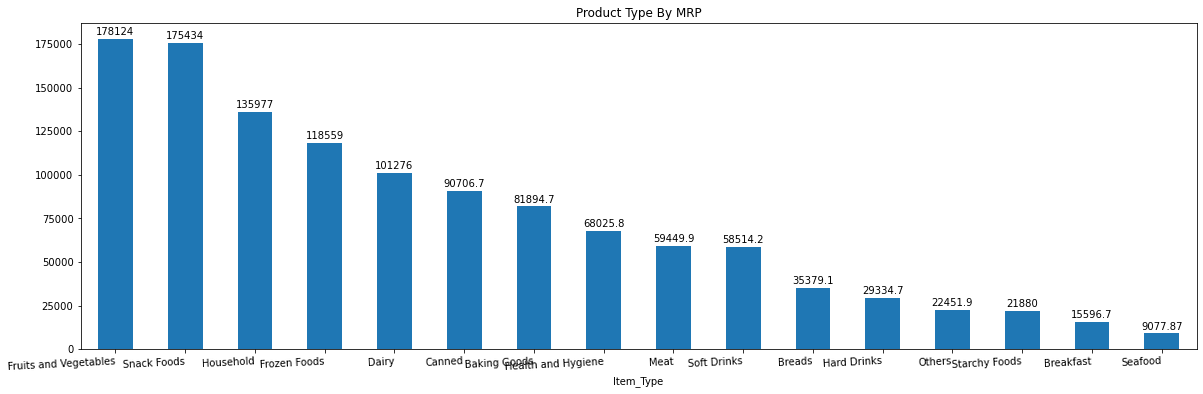

In [14]:
#product By MRp?

axes=df.groupby('Item_Type')['Item_MRP'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,6))
plt.title('Product Type By MRP')
plt.xticks(rotation=3,ha='right')
for container in axes.containers:
    axes.bar_label(container,label_type='edge',padding=2)

No Margin differences between fruit&vegetable and SnackFoods almost

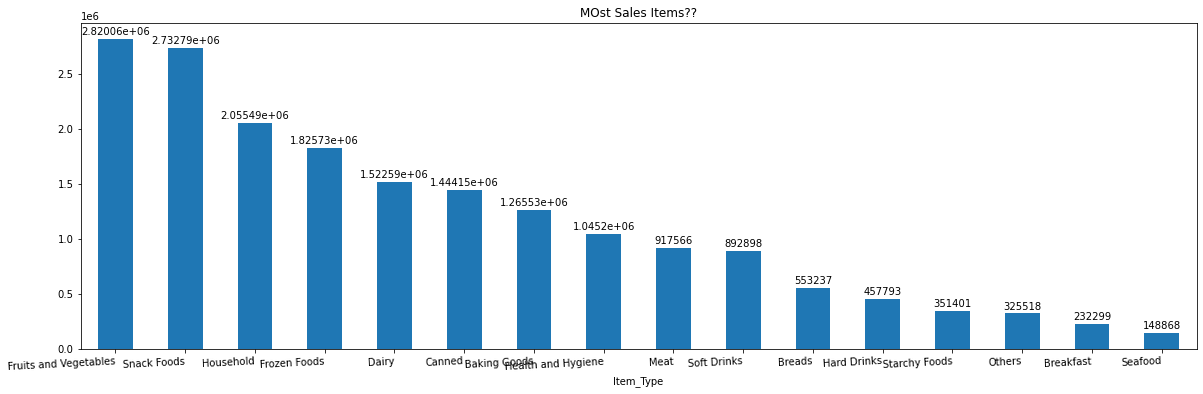

In [16]:
#Which item Category is making more sales??

axes=df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,6))
plt.title('MOst Sales Items??')
plt.xticks(rotation=3,ha='right')
for container in axes.containers:
    axes.bar_label(container,label_type='edge',padding=2)

By Sales: Fruit Vegetable is Sales items

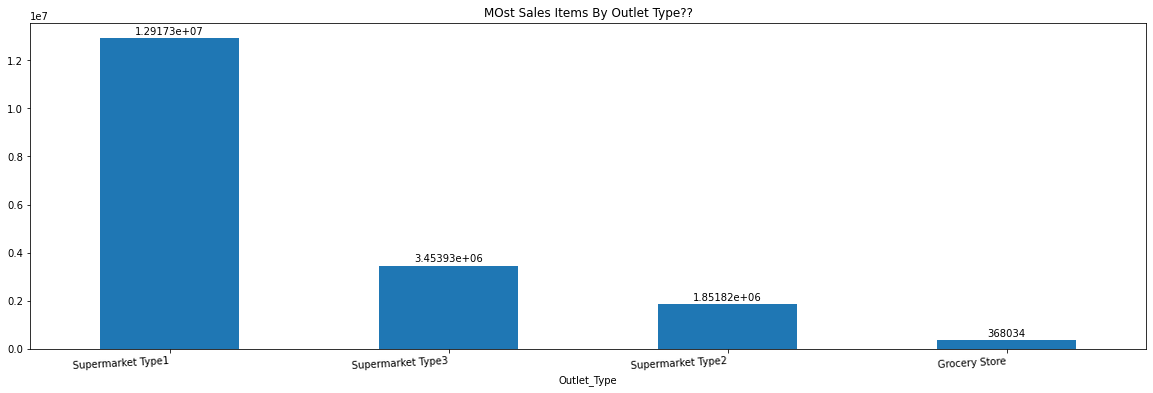

In [18]:
#whch Outtypeis making More sales??

axes=df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,6))
plt.title('MOst Sales Items By Outlet Type??')
plt.xticks(rotation=3,ha='right')
for container in axes.containers:
    axes.bar_label(container,label_type='edge',padding=2)

SuperMaarket_Type  1 is The MOst Sales Outlet Type of stores 

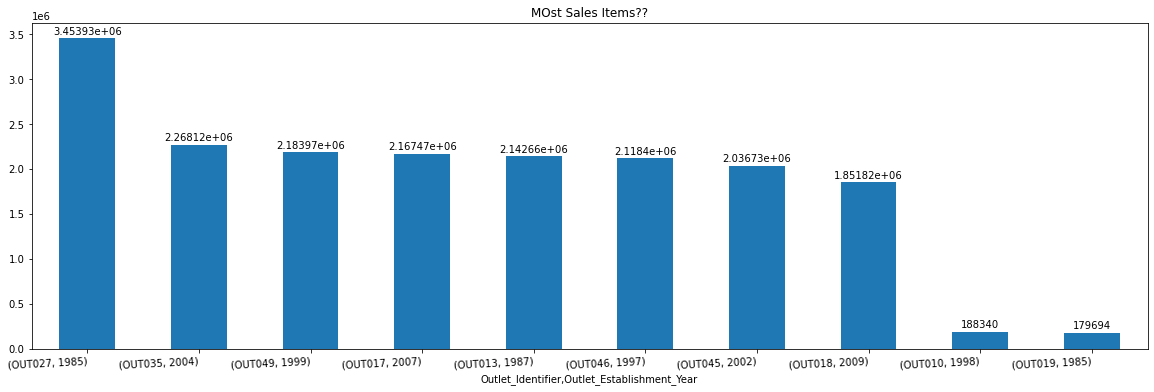

In [19]:
#WHich outlet Stores is makinng more sales ?

axes=df.groupby(by=['Outlet_Identifier','Outlet_Establishment_Year'])['Item_Outlet_Sales'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,6))
plt.title('MOst Sales Items??')
plt.xticks(rotation=3,ha='right')
for container in axes.containers:
    axes.bar_label(container,label_type='edge',padding=2)

The  1985 with the outletidentifier no OUTLET027 was one of the first Outlet in BIgmart stores and produces more most Sales.

Two Bigmart stores Was Established In 1985 first was OUTLET_027 AND THE SECOND WAS OUTLET_019:


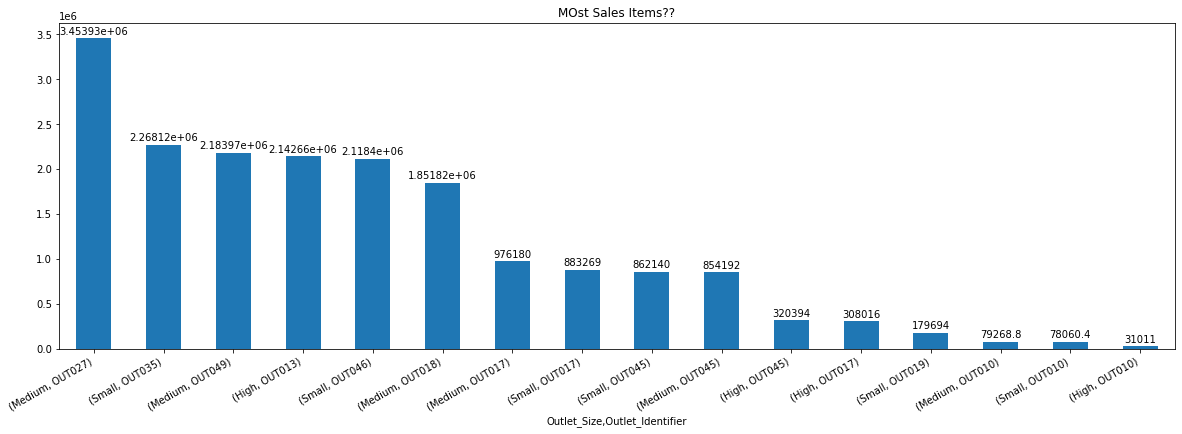

In [22]:
#outlet_Type by sales???

axes=df.groupby(by=['Outlet_Size','Outlet_Identifier'])['Item_Outlet_Sales'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,6))
plt.title('MOst Sales Items??')
plt.xticks(rotation=30,ha='right')
for container in axes.containers:
    axes.bar_label(container,label_type='edge',padding=2)

Text(0.5, 1.0, 'Outlet Types by their Size')

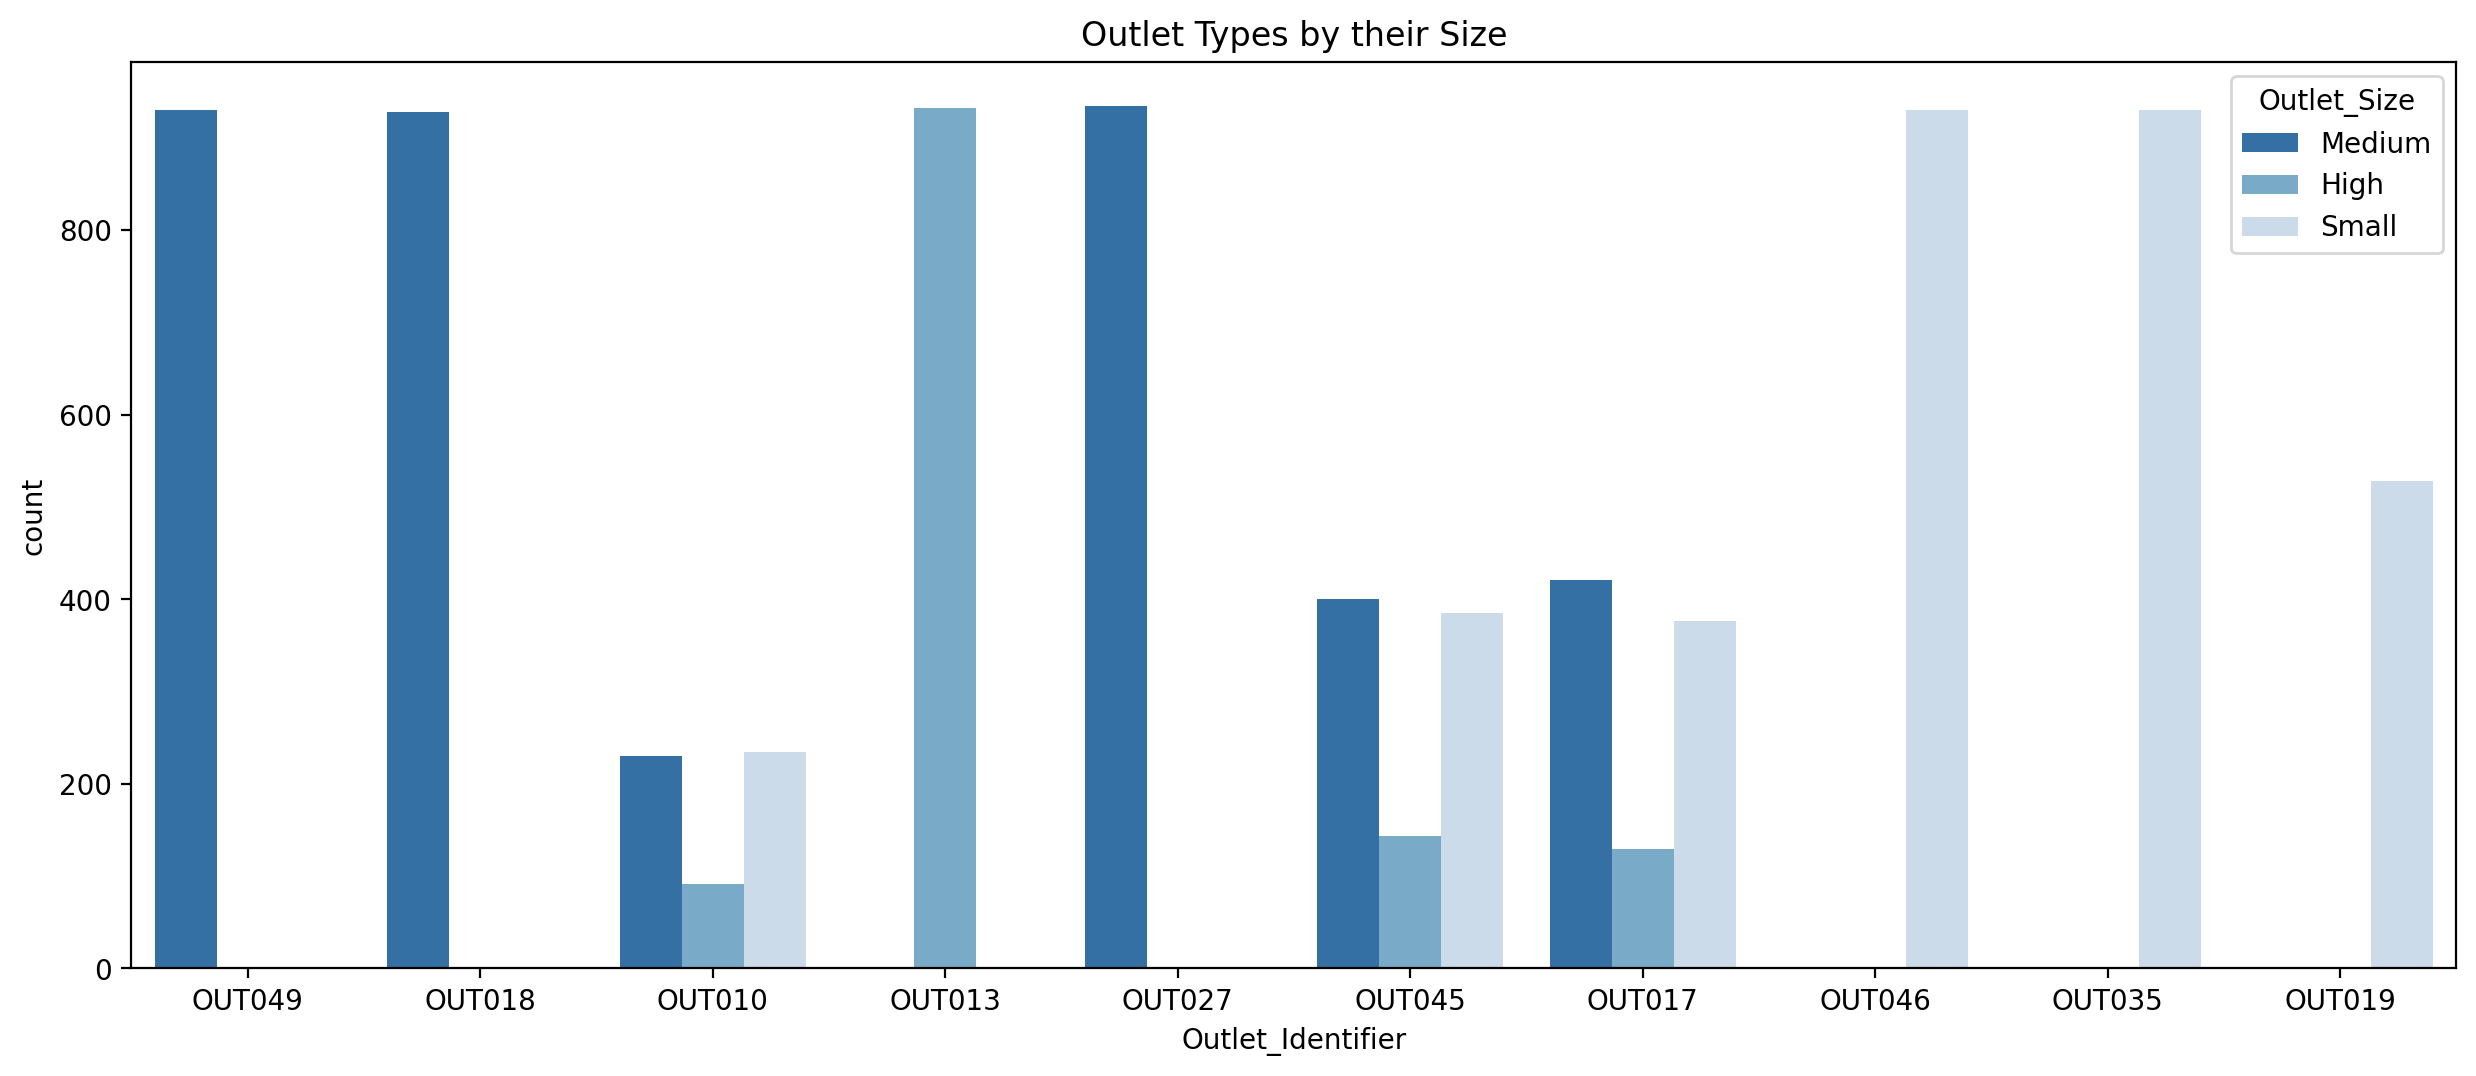

In [25]:
#checcking if the Outletidentifier has unique identifier??

plt.figure(figsize=(15,6),dpi=200)
sns.countplot(data=df,x='Outlet_Identifier',hue='Outlet_Size',palette='Blues_r')
plt.title('Outlet Types by their Size')

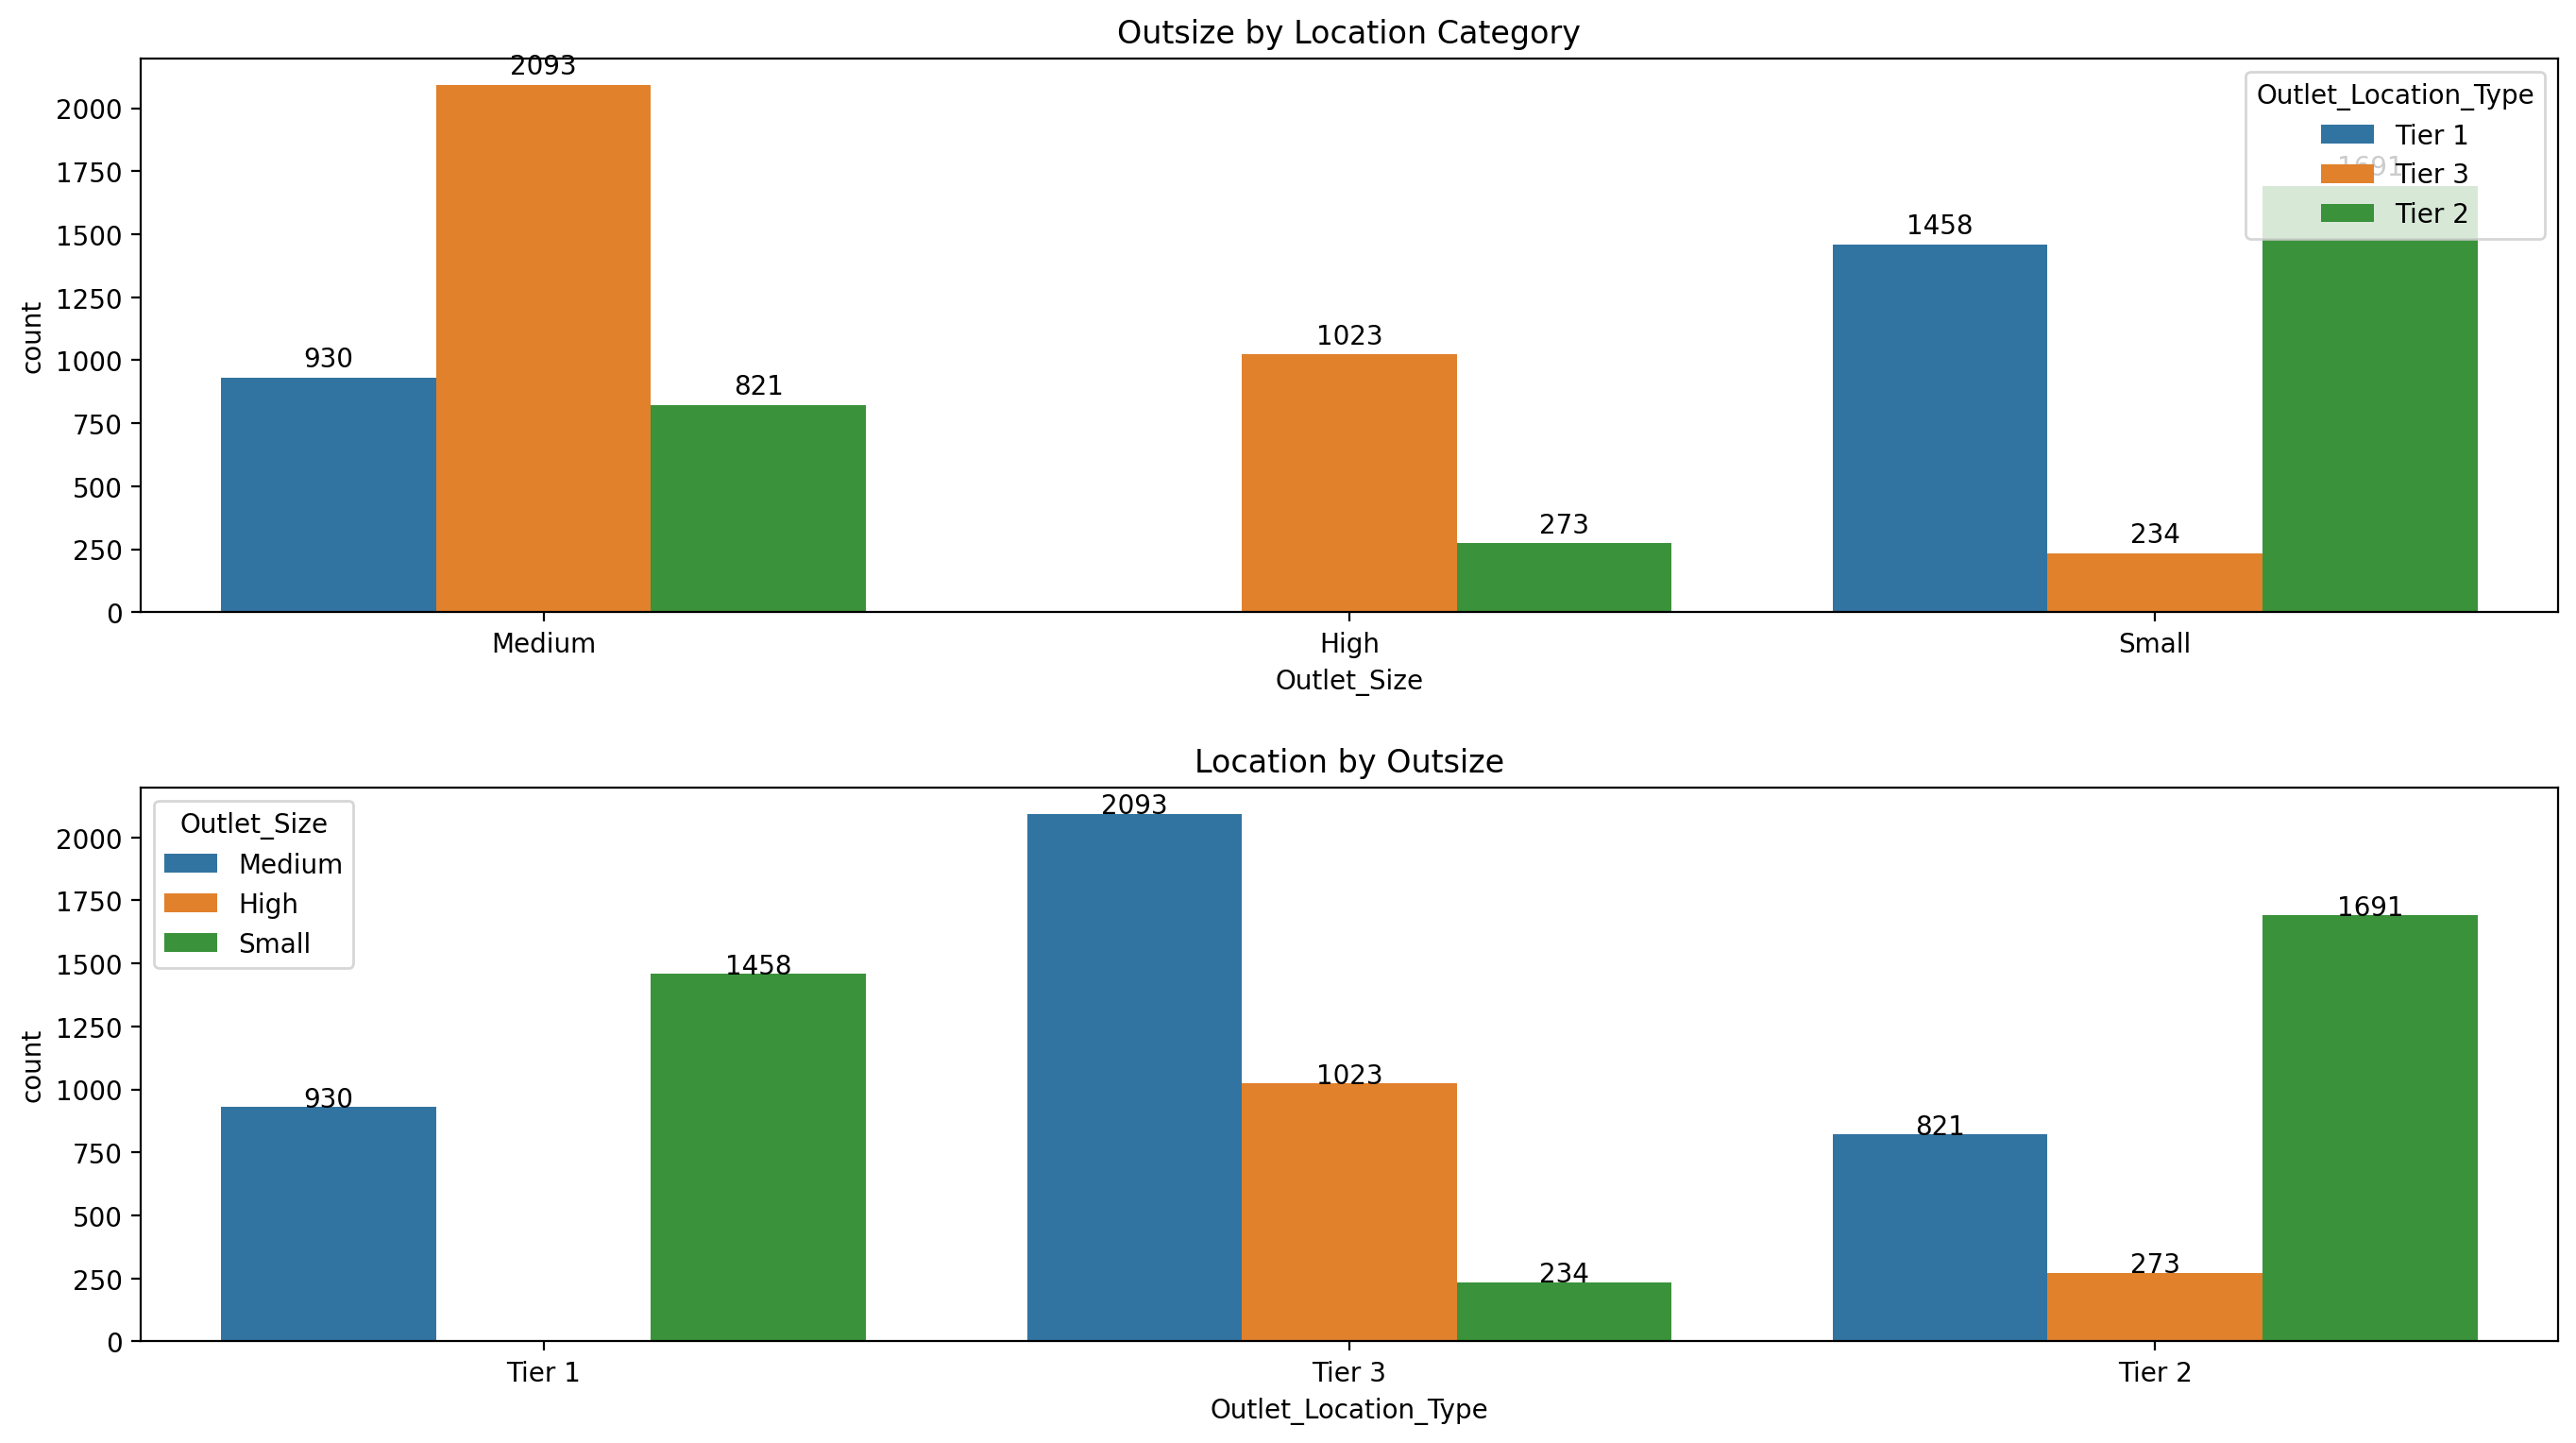

In [43]:
#Check if we can spotout some differenecs between outlet type and outletsize


fig,ax=plt.subplots(2,1,figsize=(14,8),dpi=200)
figg=sns.countplot(data=df,x='Outlet_Size',hue='Outlet_Location_Type',ax=ax[0])
ax[0].set_title('Outsize by Location Category')
fig.tight_layout(pad=2)
for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=2)

axess=sns.countplot(data=df,x='Outlet_Location_Type',hue='Outlet_Size',ax=ax[1])
plt.title('Location By Size')
ax[1].set_title('Location by Outsize')
fig.tight_layout(pad=2)
for container in axess.containers:
    axess.bar_label(container,label_type='edge',padding=-2)
    


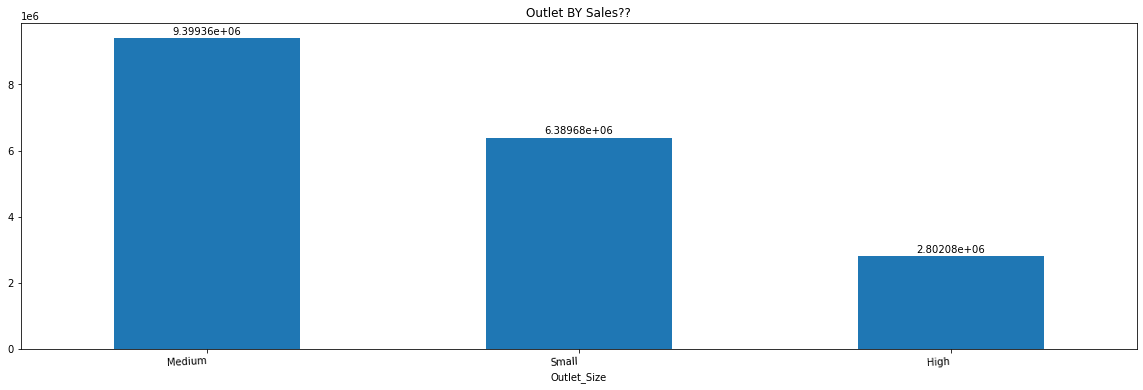

In [38]:
#which outlet making more Sales??

axes=df.groupby(by=['Outlet_Size'])['Item_Outlet_Sales'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,6))
plt.title('Outlet BY Sales??')
plt.xticks(rotation=3,ha='right')
for container in axes.containers:
    axes.bar_label(container,label_type='edge',padding=2)

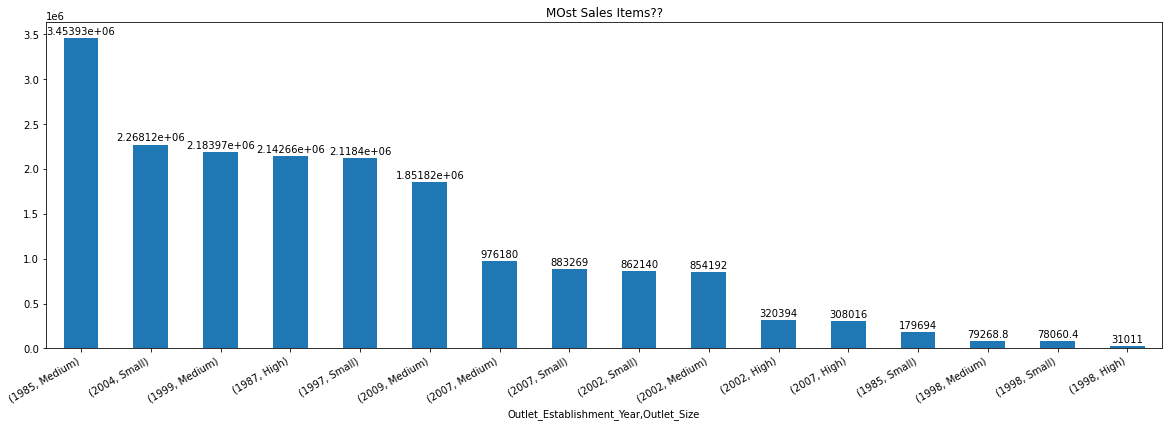

In [45]:
#The Year most Sales items Establish?

axes=df.groupby(by=['Outlet_Establishment_Year','Outlet_Size'])['Item_Outlet_Sales'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,6))
plt.title('MOst Sales Items??')
plt.xticks(rotation=30,ha='right')
for container in axes.containers:
    axes.bar_label(container,label_type='edge',padding=2)

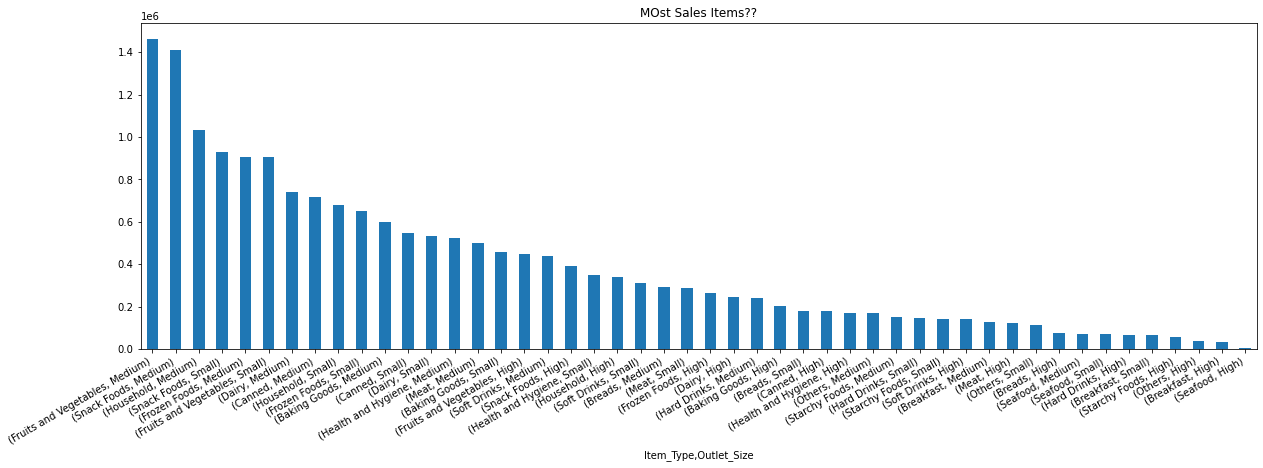

In [50]:
#in each Outlet actegory which item is making more sales ??


axes=df.groupby(by=['Item_Type','Outlet_Size'])['Item_Outlet_Sales'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,6))
plt.title('MOst Sales Items??')
plt.xticks(rotation=30,ha='right');


INSIGHT:
    
    FROM OUR VISUALIZATION THE OUTLET SIZE AND OUTLET_ESTABLISHMENT_YEAR REVEAL TO US THAT 
    TWO STORES WHERE ESTALISH ON IN 1985 ONE IS MEDIUM WHILE THE ONE IS SMALL.
    THE MEDIUM STORE IS RANK THE MOST HIGEST SALES

    BIGMART STORE HAVE TEN UNIUE IDENTIFIER AND AMONG THE UNIQUE IDENTIFIER EACH ARE CATEGORIZE HAS SIZE
    SMALL,MEDIUM AND LARGE(HIGH)
    
    THE MOST OUTLET SALES IS MEDIUM OUTSIZE.WHY? BECAUSE THEY ARE THE MOST ESTABLISH STORES.
    
    
    BIGMART HAVE ABOUT 10 Unique OUTLET_IDENTIFIER: UNDER THAT CATEGORIZATION WE HAVE:
    HIGH(LARGE) -> 1023 LARGE STORES IN TIER_3,273 IN TIER_2, 0 IN TIER_1.
    MEDIUM -> 2093 MEDIUM STORES IN TIER_3,821 MEDIUM STORE IN TIER_2,930 MEDIUM STORE IN TIER_1
    SMALL -> 234, IN SMALL STORE IN TIER_3,1691 IN SMALL STORE IN TIER_2,1458 SMALL STORES IN TIER_1
    
    LARGE(HIGH STORE) CREATED IN 1998 IS HE LOWEST SALES INCOME OF BIGMART SALES.
    
    MEDIUM STORES ITEMS SUCH AS FRUIT,SNACKS AND HOUSEHOLD MATERIALS AND MOST SALES ITEMS SALES,
    IN SMALL STORES WE HAVE SNACKS,FROZEN FOOD,FRUIT AND MOST SALES ITEMS ALSO, 
    LASTLY IN LARGE STORES FRUIT,HOUSEHOLD AND FROZENFOOD ARE THE MOST SALES ITEMS.
    
    BIGMART STORES ARE MAKING MOST OF THEIRS REVEUNE IN MEDIUM STORES.